<a href="https://colab.research.google.com/github/MAClaassen/python_course/blob/main/AAC_assignments_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.0.0 Start

In [1]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import prince
import matplotlib.colors as colors

In [3]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [4]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/MyDrive/My_project/'

results_path='/content/drive/My Drive/My_project/'

Mounted at /content/drive/


### Load data

In [5]:
# load data
AAC_accidents = pd.read_csv(data_path + '_github-AAC_accidents_tagged_data.csv')
AAC_accidents

,Search Column\n\n,ID,Accident Title,Publication Year,Text,Tags Applied,COUNT OF TAGS,<15,15-20,21-25,...,March,April,May,June,July,August,September,October,November,December
0,0,1,Failure of Rappel Setup (Protection Pulled Out...,1990.0,"Colorado, Rocky Mountain National Park\nOn May...","Serious, Head / Brain Injury, Descent, Roped, ...",8,1.0,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,"Failure of Rappel—Failure to Check System, Bri...",1990.0,"British Columbia, Squamish, Smoke Bluffs\nOn M...","Experienced, Serious, Descent, Roped, Top-Rope...",7,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,"Fall into Crevasse, Climbing Alone, Inadequate...",1990.0,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...","Experienced, Minor, Unroped , Solo, Climbing A...",9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
3,0,4,"Fall into Crevasse, Climbing Unroped, British ...",1990.0,"British Columbia, Bugaboo Mountains, Bugaboo S...","Minor, Unroped , Solo, Alpine/Mountaineering, ...",5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,0,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",1990.0,"On the afternoon of March 29, 1989, four ski t...","Deadly, Serious, Descent, Unroped , Solo, Non-...",10,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,0,958a,"Fall on Ice, Inadequate Protection, Poor Posit...",2000.0,"Alberta, Banff National Park, Cascade Waterfal...","No/Little, Deadly, Descent, Unroped , Solo, Ic...",9,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2766,0,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",2000.0,"Alberta, Banff National Park, Cascade Waterfal...","Serious, Descent, Roped, Ice Climbing, Avalanc...",8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2767,0,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",2000.0,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Descent, Alpine/Mountaineering, Ascent Illness...",4,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2768,0,995b,Edited title: Acute Mountain Sickness — Alask...,2000.0,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Serious, Descent, Alpine/Mountaineering, Ascen...",5,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

# 2. Ensured Date was in DateTime format


AAC_accidents['Publication Year'] = pd.to_datetime(AAC_accidents['Publication Year'], yearfirst=True, format = '%Y')
AAC_accidents['Publication Year'] = pd.DatetimeIndex(AAC_accidents['Publication Year']).year
AAC_accidents['Publication Year'] = AAC_accidents['Publication Year'].fillna(0)
AAC_accidents['Publication Year'] = AAC_accidents['Publication Year'].astype(int)


# 3. Replaced NaN for 0


AAC_accidents= AAC_accidents.fillna(0)


# 4. I wanted to create a new column with the location of the accident. This would involve matching the Text and accident columns to a list containing Canadian Provinces and US States


Provinces_States = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California',
             'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
             'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
             'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
             'Minor Outlying Islands', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
             'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
             'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
             'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands',
             'Utah', 'Vermont', 'Virginia', 'Washington',
             'West Virginia', 'Wisconsin', 'Wyoming','Alberta', 'British Columbia', 'Manitoba','New Brunswick', 'Newfoundland and Labrador',
                 'Northwest Territories', 'Nova Scotia','Nunavut', 'Ontario', 'Prince Edward Island' , 'PEI',
                 'Quebec','Saskatchewan', 'Yukon']

#5. Created a new Location Column
AAC_accidents['Location'] = ''


for i in range(AAC_accidents.shape[0] - 1):
    title = AAC_accidents['Accident Title'].iloc[i]
    text = AAC_accidents['Text'].iloc[i]
    location = None
    for place in Provinces_States:
        if place in title:
            location = place
            break
        elif place in text:
            location = place
            break
    if location == None:
        print(title)

        print()

    AAC_accidents['Location'].iloc[i]=location

AAC_accidents['Location'].isna().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Avalanche, Fall on Snow and Ice, Pueblo, El Pico de Orizaba

Rappel Error—Misuse of Grigri, Baffin Island, Stewart Valley

Fall on Rock - Lost Balance, Protection Pulled Out 
Crowders Mountain State Park, Two-Pitch Wall

Fall on Rock, Falling Rock - Failure to Test Holds, Inadequate Belay 
Humphrey's Ledge, Tree Keys

Fall On Rock – Inadequate Belay 
Roosevelt National Forest, Dream Canyon

Rockfall – Poor Position 
Canada, Yamnuska, Missionary's Crack

Slip On Rock, Rappel Error – Alcohol, Poor Position 
San Bernadino Mountains, Lucerne Valley

Illness 
Canada, Yokon, Kluane National Park and Reserve, Mt. Logan, East Ridge

Anchor Failure – Off-Route 
Wind River Range, Pingora Peak

Fall on Rock – Incomplete Tie-In Knot 
Canada, Québec, Racine, Lac Larouche

HAPE 
Denali, West Buttress

Fall on Rock, Stranded – Off-Route, Inadequate Gear 
Grand Teton National Park, Teewinot

An Untimely Slip 
New River Gorge, Meadow River

Rappel Error — Damaging Pendulum Swing 
Yosemite Valley, Royal

69

In [7]:
# check what variables are in the data
AAC_accidents.columns

Index(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', '<15', '15-20', '21-25', '26-30',
       '31-35', '36-50', '51-75', '>75', 'No/Little', 'Moderate',
       'Experienced', 'Unknown', 'Deadly', 'Serious', 'Minor',
       'Head / Brain Injury', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'Top-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate

It is clear from the list above that I will need to melt a lot of columns into factors. 

In [8]:
# set row number so I can use it as index later
#AAC_accidents['ID'] = AAC_accidents.reset_index().index

In [9]:
# remove some columns
AAC_accidents = AAC_accidents.drop(columns=['Search Column\n\n', 'Tags Applied', 'COUNT OF TAGS'])

In [10]:
# look at types of variables
print(AAC_accidents.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 94 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2770 non-null   object 
 1   Accident Title                   2770 non-null   object 
 2   Publication Year                 2770 non-null   int64  
 3   Text                             2770 non-null   object 
 4   <15                              2770 non-null   float64
 5   15-20                            2770 non-null   float64
 6   21-25                            2770 non-null   float64
 7   26-30                            2770 non-null   float64
 8   31-35                            2770 non-null   float64
 9   36-50                            2770 non-null   float64
 10  51-75                            2770 non-null   float64
 11  >75                              2770 non-null   float64
 12  No/Little           

# Descriptives

## Plotting geo location - total amounts

In [11]:
# load geographic information to join to the data set
geo_location = pd.read_csv(data_path + 'geo_location.csv')
geo_location['Location'] = geo_location['name']
AAC_accidents_geo = pd.merge(AAC_accidents, geo_location, how = 'left', on = 'Location')

In [12]:
# keep only the relevant columns
AAC_accidents_geo_select = AAC_accidents_geo[['Location', 'latitude', 'longitude']]
AAC_accidents_geo_select

,Location,latitude,longitude
0,Colorado,39.550051,-105.782067
1,British Columbia,53.726669,-127.647621
2,Alberta,36.855200,-77.893700
3,British Columbia,53.726669,-127.647621
4,Alberta,36.855200,-77.893700
...,...,...,...
2765,Alberta,36.855200,-77.893700
2766,Alberta,36.855200,-77.893700
2767,Alaska,63.588753,-154.493062
2768,Alaska,63.588753,-154.493062


In [13]:
# give each observation a value such that they can be summed up with pivot_table 
AAC_accidents_geo_select['amount'] = '1'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# use pivot_table to reshape long data into wide data: 1 row per location
AAC_accidents_geo_amount = AAC_accidents_geo_select.pivot_table(index=['Location', 'latitude', 'longitude'], 
                       values='amount', 
                       aggfunc='count', fill_value=0)

In [15]:
# remove index from columns such that they can be plotted
AAC_accidents_geo = AAC_accidents_geo_amount.rename_axis(['Location', 'latitude', 'longitude']).reset_index()

## Figure 1

In [16]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 125 kB/s 


In [17]:
import kaleido 

In [18]:
import plotly
import plotly.express as px
#import chart_studio.plotly as py

In [19]:
fig = go.Figure(data = go.Scattergeo(
        #locationmode = 'USA-states',
        lon = AAC_accidents_geo['longitude'],
        lat = AAC_accidents_geo['latitude'],
        text = AAC_accidents_geo[['Location', 'amount']],
        marker = dict(
            size = AAC_accidents_geo['amount'],
            color = AAC_accidents_geo['amount'],
                colorscale ='viridis',
                showscale = True,
            line_color='white',
            line_width=0.5,
            sizemode = 'area'
        )))

fig.update_layout(
        title_text = 'Number of accidents per location',
        showlegend = False,
        geo = dict(
            scope = 'north america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

# save figure as html
#fig.write_html("/content/drive/MyDrive/My_project/location.html")

# Recode categorical variables

In this section I am recoding the variables in the dataframe using the 'melt' function. This turns a wide dataframe into a long dataframe. More concretely, I am creating factor variables with different levels from a set of columns in the dataframe that each represent 1 particular level of the category. 

## Seriousness of accident

I am only selecting accidents tagged as deadly, serious, and minor. The tag 'Head/Brain injury' overlaps with, for instance, the tag 'serious". 

In [20]:
# seriousness of accident
melt_serious = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Deadly', 'Serious', 'Minor'],
       var_name = 'Seriousness')

melt_serious = melt_serious.loc[(melt_serious['value'] != 0)] #remove rows with no observations

melt_serious = melt_serious.drop('value', 1) #drop the value column

melt_serious #view df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Seriousness
4,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",Deadly
5,6,"Fall into Moat, Descending Unroped, Poor Posit...",Deadly
11,12,"Fall on Rock, Climbing Solo, No Hard Hat, Inex...",Deadly
12,13,"Fall on Rock, Climbing Solo, No Hard Hat, Queb...",Deadly
19,20,"Fall on Snow, Inadequate Equipment, California...",Deadly
...,...,...,...
8275,619t,"Fall on Ice, Inadequate Protection, Montana, H...",Minor
8277,660a,"Stranded, Inexperience, Inadequate Equipment, ...",Minor
8288,744a,"Faulty Use of Crampons—Glissading, New Hampshi...",Minor
8290,750t,"Stranded, Failure to Follow Route, Climbing Al...",Minor


In [21]:
# reorder factor levels of variable such that there is a logical order of the seriousness of the accidents
melt_serious['Seriousness'] = melt_serious['Seriousness'].astype('category')
melt_serious['Seriousness'] = melt_serious['Seriousness'].cat.reorder_categories(['Minor', 'Serious', 'Deadly'])

### Figure 2a - Seriousness of accident

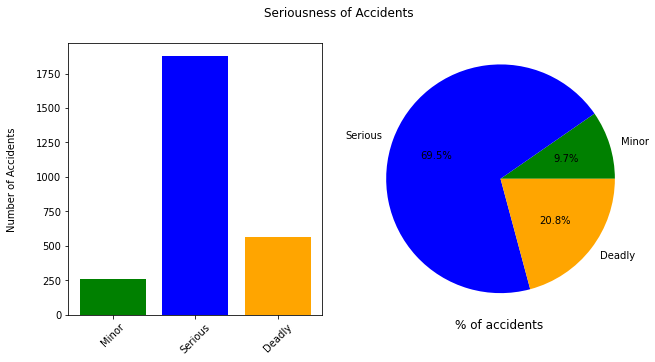

In [22]:
fig, axs = plt.subplots(1,2,figsize=(10, 5)) # define subplots rows, columns, and size

seriousness_count = melt_serious['Seriousness'].value_counts().sort_index() #sort_index() to get the right order set for this category
colours = ['green', 'blue', 'orange'] 
labels = melt_serious['Seriousness'].cat.categories.tolist()

axs[0].bar(labels, seriousness_count, color = colours) # makebar plot

sizes = seriousness_count
axs[1].pie(sizes, labels = labels, colors = colours, autopct='%1.1f%%') #make pie plot
plt.axis('equal')
plt.xlabel('% of accidents', fontsize=12)

fig.suptitle("Seriousness of Accidents") #common title
fig.text(0.04, 0.5, 'Number of Accidents', va='center', rotation='vertical') #common y-axis

# rotate axes 
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)

In [23]:
# attach new variable to main dataframe
AAC_serious = melt_serious.merge(AAC_accidents, how = 'right', on = ['ID', 'Accident Title'])

## Type of climbing

As a first analysis of this dataset, I will focus on the climbing categories trad climbing, sport, bouldering and solo (roped; unroped refers mostly to hikes). It is outside the scope of this analysis to include aid & big wall climbing, ice climbing, alpine-mountaineering, given that they are non-exlusive (e.g., big wall climbing may involve trad or sport climbing). 

In [24]:
# type of climb
melt_type = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Trad Climbing', 'Sport', 'Bouldering', 'Solo'],
       var_name = 'Type_climbing')

melt_type = melt_type.loc[(melt_type['value'] != 0)]

melt_type = melt_type.drop('value', 1)

melt_type

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Type_climbing
0,1,Failure of Rappel Setup (Protection Pulled Out...,Trad Climbing
9,10,"Fall on Rock, Chocks Pulled Out, Quebec, Gatin...",Trad Climbing
14,15,"Fall on Rock, Inadequate Protection, Alberta, ...",Trad Climbing
15,16,"Fall on Rock, Inadequate Protection, Ontario, ...",Trad Climbing
16,17,"Fall on Rock, No Helmet, Quebec, Gatineau Park...",Trad Climbing
...,...,...,...
11065,835t,"Fall on Snow, Failure to Follow Route, Inadequ...",Solo
11068,853t,"Fall on Rock, Climbing Alone, Inadequate Cloth...",Solo
11070,885t,"Fall on Snow, Unable to Self-Arrest, Fall into...",Solo
11072,93t,"Fall on Ice, Climbing Unroped, Party Separated...",Solo


In [50]:
# percentage of accidents involving these three types of climbing
len(melt_type)/len(AAC_accidents)*100

58.70036101083033

### Figure 2b - Type of climbing

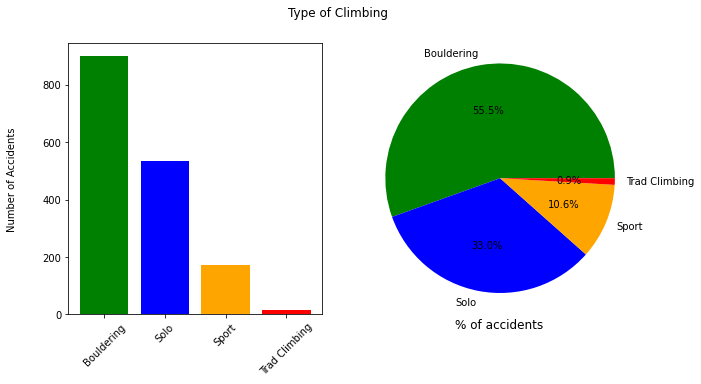

In [25]:
fig, axs = plt.subplots(1,2,figsize=(10, 5)) # define subplots rows, columns, and size

type_count = melt_type['Type_climbing'].value_counts()
colours = ['green', 'blue', 'orange', 'red'] 
melt_type['Type_climbing'] = melt_type['Type_climbing'].astype('category')
labels = melt_type['Type_climbing'].cat.categories.tolist()

axs[0].bar(labels, type_count, color = colours) # makebar plot

sizes = type_count
axs[1].pie(sizes, labels = labels, colors = colours, autopct='%1.1f%%') #make pie plot
plt.axis('equal')
plt.xlabel('% of accidents', fontsize=12)

fig.suptitle("Type of Climbing") #common title
fig.text(0.04, 0.5, 'Number of Accidents', va='center', rotation='vertical') #common y-axis

# rotate axes 
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)

In [26]:
# attach new variable to main dataframe
AAC_serious_type = melt_type.merge(AAC_serious, how = 'right', on = ['ID', 'Accident Title'])

## Experience

This category deals with how experienced the person involved in the accident is. 

In [27]:
# melt experience
melt_experience = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                                     value_vars =   ['No/Little', 'Moderate',
       'Experienced', 'Unknown'],
       var_name = 'Experience')

melt_experience = melt_experience.loc[(melt_experience['value'] != 0)]
melt_experience = melt_experience.drop('value', 1)
melt_experience

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Experience
10,11,"Fall on Rock, Climbing Solo, Inadequate Equipm...",No/Little
11,12,"Fall on Rock, Climbing Solo, No Hard Hat, Inex...",No/Little
13,14,"Fall on Rock, Free-Solo, Exceeding Abilities, ...",No/Little
20,21,"Fall on Snow, Inadequate Protection, No Hard H...",No/Little
26,28,"Falling Rock, Fall on Ice, Faulty Use of Cramp...",No/Little
...,...,...,...
10882,1670t,"Jumped into Crevasse, and then Later Fell in C...",Unknown
10908,1959a,"HAPE and ..., Washington, Mount Rainier, Camp ...",Unknown
10909,1959b,"... HACE, Washington, Mount Rainier, Camp Muir",Unknown
10919,2065a,"Illness ...), Washington, Mount Rainier",Unknown


In [28]:
# change factor levels of variable
melt_experience['Experience'] = melt_experience['Experience'].astype('category')
melt_experience['Experience'] = melt_experience['Experience'].cat.reorder_categories(['No/Little', 'Moderate', 'Experienced', 'Unknown'])

### Figure 2c - Experience

Here I look at the number of accidents for every level of experience that the person involved had. I select 'unkwown' for these descritives, but this category will be removed later from further analysis. 

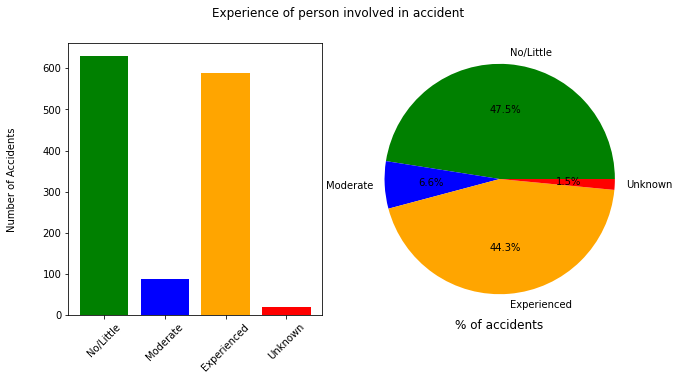

In [29]:
fig, axs = plt.subplots(1,2,figsize=(10, 5)) # define subplots rows, columns, and size

experience_count = melt_experience['Experience'].value_counts().sort_index() #sort_index() to get the right order set for this category
colours = ['green', 'blue', 'orange', 'red']
labels = melt_experience['Experience'].cat.categories.tolist()

axs[0].bar(labels, experience_count, color = colours) # makebar plot

sizes = experience_count
axs[1].pie(sizes, labels = labels, colors = colours, autopct='%1.1f%%') #make pie plot
plt.axis('equal')
plt.xlabel('% of accidents', fontsize=12)

fig.suptitle("Experience of person involved in accident") #common title
fig.text(0.04, 0.5, 'Number of Accidents', va='center', rotation='vertical') #common y-axis

# rotate axes 
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)

In [30]:
# remove 'unknown' category
melt_experience['Experience'] = melt_experience['Experience'].cat.remove_categories('Unknown')

In [31]:
# attach new variable to main dataframe
AAC_serious_type_experience = melt_experience.merge(AAC_serious_type, how = 'right', on = ['ID', 'Accident Title'])

## Age

In [32]:
# age
melt_age = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['<15', '15-20', '21-25', '26-30', '31-35', '36-50', '51-75', '>75'],
                              var_name = 'Age')

melt_age = melt_age.loc[(melt_age['value'] != 0)]
melt_age = melt_age.drop('value', 1)
melt_age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Age
0,1,Failure of Rappel Setup (Protection Pulled Out...,<15
80,91,"Fall into Crevasse, Unroped, Public on Glacier...",<15
147,162,"Lightning, Maine, Mount Katahdin, Baxter State...",<15
148,163,"Loss of Control—Voluntary Glissade, Fall into ...",<15
306,338,"Fall on Rock, Placed Inadequate Protection, Ou...",<15
...,...,...,...
19320,2684a,"Tahquitz Rock Fatalities \nCalifornia, Tahquit...",51-75
19355,619t,"Fall on Ice, Inadequate Protection, Montana, H...",51-75
19382,93t,"Fall on Ice, Climbing Unroped, Party Separated...",51-75
19928,590,"Fall on Rock, Unroped, No Hard Hat, Alberta, R...",>75


In [33]:
# change factor levels of variable
melt_age['Age'] = melt_age['Age'].astype('category')
melt_age['Age'] = melt_age['Age'].cat.reorder_categories(['<15', '15-20', '21-25', '26-30', '31-35', '36-50', '51-75', '>75'])

### Figure 2d - Age

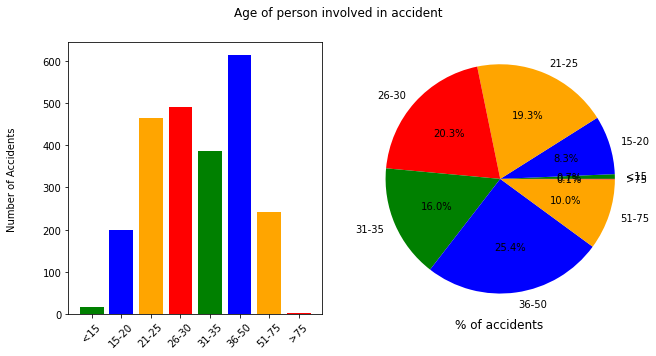

In [34]:
fig, axs = plt.subplots(1,2,figsize=(10, 5)) # define subplots rows, columns, and size

age_count = melt_age['Age'].value_counts().sort_index() #sort_index() to get the right order set for this category
colours = ['green', 'blue', 'orange', 'red']
labels = melt_age['Age'].cat.categories.tolist()

axs[0].bar(labels, age_count, color = colours) # makebar plot

sizes = age_count
axs[1].pie(sizes, labels = labels, colors = colours, autopct='%1.1f%%') #make pie plot
plt.axis('equal')
plt.xlabel('% of accidents', fontsize=12)

fig.suptitle("Age of person involved in accident") #common title
fig.text(0.04, 0.5, 'Number of Accidents', va='center', rotation='vertical') #common y-axis

# rotate axes 
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)

    fig.savefig(data_path +'age.jpg', bbox_inches='tight', dpi = 600)

In [35]:
# attach new variable to main dataframe
AAC_serious_type_experience_age = melt_age.merge(AAC_serious_type_experience, how = 'right', on = ['ID', 'Accident Title'])

## Nature

In [36]:
# nature
melt_nature = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall'],
                              var_name = 'Nature')

melt_nature = melt_nature.loc[(melt_nature['value'] != 0)]
melt_nature = melt_nature.drop('value', 1)
melt_nature

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Nature
43,47,"Weather, Fall on Snow, Exposure, Alaska, Mount...",Visibility
73,83,"Weather, Fatigue, Failure to Follow Route, Fal...",Visibility
79,90,"Fall into Crevasse, Unroped, Alberta, Rocky Mo...",Visibility
109,121,"HAPE, Frostbite, Party Seperated, Inexperience...",Visibility
155,171,"Stranded, Darkness, Falled to Follow Direction...",Visibility
...,...,...,...
10943,2364f,"Fall on Rock – Suspected Rockfall, Climbing Al...",Natural Rockfall
10963,2479b,"Rockfall \nOregon, Mt. Hood, South Side",Natural Rockfall
11003,2649c,"Mt. Shasta rockfall\nCalifornia, Mt. Shasta an...",Natural Rockfall
11009,2682b,"Rocky Mountain National Park, Rockfall \nColor...",Natural Rockfall


### Figure 2e - Nature

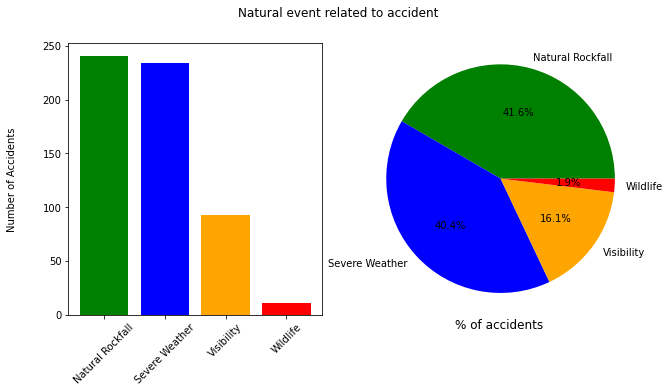

In [37]:
fig, axs = plt.subplots(1,2,figsize=(10, 5)) # define subplots rows, columns, and size

nature_count = melt_nature['Nature'].value_counts()
colours = ['green', 'blue', 'orange', 'red']
melt_nature['Nature'] = melt_nature['Nature'].astype('category')
labels = melt_nature['Nature'].cat.categories.tolist()


axs[0].bar(labels, nature_count, color = colours) # makebar plot

sizes = nature_count
axs[1].pie(sizes, labels = labels, colors = colours, autopct='%1.1f%%') #make pie plot
plt.axis('equal')
plt.xlabel('% of accidents', fontsize=12)

fig.suptitle("Natural event related to accident") #common title
fig.text(0.04, 0.5, 'Number of Accidents', va='center', rotation='vertical') #common y-axis

# rotate axes 
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)

#fig.savefig(data_path +'nature.jpg', bbox_inches='tight', dpi = 600)

In [38]:
# attach new variable to main dataframe
AAC_serious_type_experience_age_nature = melt_nature.merge(AAC_serious_type_experience_age, how = 'right', on = ['ID', 'Accident Title'])

## Human causes

In [39]:
#causes
melt_causes = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Non-Ascent Illness', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication'],
                              var_name = 'Causes')

melt_causes = melt_causes.loc[(melt_causes['value'] != 0)]
melt_causes = melt_causes.drop('value', 1)
melt_causes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Causes
164,183,"Failure to Communicate, Illness, Alaska, Mount...",Non-Ascent Illness
443,488,"Grand Mal Seizures, Alaska, Mount McKinley",Non-Ascent Illness
512,564,"Acute Abdomen, Alaska, Mount McKinley, West Bu...",Non-Ascent Illness
513,565,"Atrial Fibrillation, Alaska, Mount McKinley, W...",Non-Ascent Illness
618,680,"Appendicitis, Alaska, Mount McKinley, Muldrow ...",Non-Ascent Illness
...,...,...,...
82881,1481t,"Fall on Rock—Lowering Error, Communication Pro...",Miscommunication
82898,1604t,"Fall on Rock—Dislocated Knee, Fall on Snow—Una...",Miscommunication
82925,189t,"Fall on Rock while Rappelling, Miscommunicatio...",Miscommunication
82954,2247t,"Fall on Rock, Lowering Error \nMaine, Acadia N...",Miscommunication


### Figure 2f - Human causes

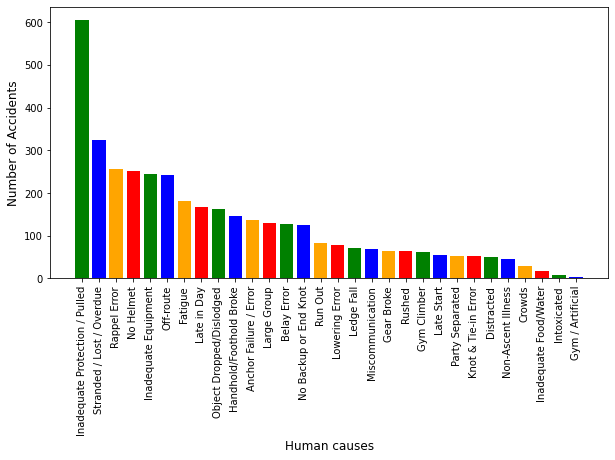

In [40]:
causes_count = melt_causes['Causes'].value_counts()
#colours = ['green', 'blue', 'orange', 'red']

plt.figure(figsize=(10,5))
plt.bar(causes_count.index, causes_count.values, alpha=1, color = colours)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Human causes', fontsize=12)
plt.xticks(rotation = 90)

plt.show()
#fig.savefig(data_path +'causes.jpg', bbox_inches='tight', dpi = 600)

In [41]:
# attach new variable to main dataframe
AAC_serious_type_experience_age_nature_causes = melt_causes.merge(AAC_serious_type_experience_age_nature, how = 'right', on = ['ID', 'Accident Title'])

### Causes merged to seriousness

In [ ]:
# attach new variable to main dataframe
AAC_serious_cause = melt_causes.merge(AAC_serious, how = 'right', on = ['ID', 'Accident Title'])

# Crosstabs

## Seriousness by type of climbing

In [ ]:
pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Type_climbing, margins=True, margins_name="Total", 
            rownames = ["Seriousness of Accident"], colnames = ["Type of Climbing"])

In [ ]:
# heatmap of crosstab
sns.heatmap(pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Type_climbing),
            cmap="YlGnBu", annot=True, fmt = ".3g", cbar=False)

In [ ]:
#import sys
#!{sys.executable} -m pip install scipy

In [ ]:
#!pip install scipy

In [ ]:
#pip install scipy

In [ ]:
#pip install --user scipy

In [ ]:
#import scipy

In [ ]:
pip install scipy.stats

In [ ]:
from scipy import stats

In [ ]:
contingency = pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Type_climbing)
# Chi-square test of independence. 
chi2, p, dof, expected = stats.chi2_contingency(contingency) 
# Print the p-value
print(p)

## Seriouness by experience

In [ ]:
pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Experience, margins=True, margins_name="Total", 
            rownames = ["Seriousness of Accident"], colnames = ["Experience"])

In [ ]:
# heatmap of crosstab
sns.heatmap(pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Experience),
            cmap="YlGnBu", annot=True, fmt = ".3g", cbar=False)

In [ ]:
contingency = pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Experience)
# Chi-square test of independence. 
chi2, p, dof, expected = stats.chi2_contingency(contingency) 
# Print the p-value
print(p)

## Seriousness by age

In [ ]:
pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Age, margins=True, margins_name="Total", 
            rownames = ["Seriousness of Accident"], colnames = ["Age"])

In [ ]:
# heatmap of crosstab
sns.heatmap(pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Age),
            cmap="YlGnBu", annot=True, fmt = ".3g", cbar=False)

In [ ]:
contingency = pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Age)
# Chi-square test of independence. 
chi2, p, dof, expected = stats.chi2_contingency(contingency) 
# Print the p-value
print(p)

# MCA

## MCA seriousness, type of climbing, experience

In [ ]:
# select columns
MCA_serious= AAC_serious_type_experience_age_nature_causes[["Seriousness", "Type_climbing", "Experience"]]

In [ ]:
# drop NA because MCA does not take NA
MCA_serious = MCA_serious.dropna()
MCA_serious

In [ ]:
mca = prince.MCA()

In [ ]:
mca = mca.fit(MCA_serious)
mca = mca.transform(MCA_serious) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


In [ ]:
mca = prince.MCA()
mca = mca.fit(MCA_serious)

In [ ]:
ax = mca.plot_coordinates(
     X=MCA_serious,
     ax=None,
     figsize=(15, 15),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=100,
     show_column_labels=True,
     legend_n_cols=1
     )

In [ ]:
mca.explained_inertia_

In [ ]:
# there's a lot of duplicate accidents in our new dataframe 
#ids = AAC_accidents5["ID"]

#AAC_accidents5[ids.isin(ids[ids.duplicated()])].sort_values("ID")

In [ ]:
# select columns
MCA_main_cat = AAC_serious_type_experience_age[["Experience", "Type_climbing", "Seriousness", "Age"]]

In [ ]:
# frop NA because MCA does not take NA: only 867 accidents left
MCA_main_cat = MCA_main_cat.dropna()
MCA_main_cat

In [ ]:
#pip install prince

In [ ]:
#import prince

In [ ]:
mca = prince.MCA()

In [ ]:
mca = mca.fit(MCA_main_cat)
mca = mca.transform(MCA_main_cat) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


In [ ]:
mca = prince.MCA()
mca = mca.fit(MCA_main_cat)

Is everything squished because there's a lot of overlap in the points?

In [ ]:
ax = mca.plot_coordinates(
     X=MCA_main_cat,
     ax=None,
     figsize=(15, 15),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=100,
     show_column_labels=True,
     legend_n_cols=1
     )

## MCA causes and seriousness

In [ ]:
# select columns
MCA_causes = AAC_serious_cause[["Seriousness", "Causes"]]

In [ ]:
# drop NA because MCA does not take NA
MCA_causes = MCA_causes.dropna()
MCA_causes

In [ ]:
mca = prince.MCA()

In [ ]:
mca = mca.fit(MCA_causes)
mca = mca.transform(MCA_causes) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


In [ ]:
mca = prince.MCA()
mca = mca.fit(MCA_causes)

In [ ]:
ax = mca.plot_coordinates(
     X=MCA_causes,
     ax=None,
     figsize=(15, 15),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=100,
     show_column_labels=True,
     legend_n_cols=1
     )

In [ ]:
mca.explained_inertia_

## MCA causes, seriousness, type of climbing, experience

In [ ]:
# select columns to be included in MCA
MCA_causes = AAC_serious_type_experience_age_nature_causes[['Seriousness', 'Type_climbing', 'Experience', 'Causes']]

In [ ]:
# drop NA because MCA does not take NA: only 1675 accidents left
MCA_causes = MCA_causes.dropna()
MCA_causes

In [ ]:
mca = prince.MCA()

In [ ]:
mca = mca.fit(MCA_causes)
mca = mca.transform(MCA_causes) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


In [ ]:
mca = prince.MCA()
mca = mca.fit(MCA_causes)

In [ ]:
#plt.plot(np.cumsum(mca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
mca = MCA().fit(digits.data)
plt.plot(np.cumsum(mca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
ax = mca.plot_coordinates(
     X=MCA_causes,
     ax=None,
     figsize=(15, 15),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=100,
     show_column_labels=True,
     legend_n_cols=1
     )

In [ ]:
mca.eigenvalues_

[0.5672691337628497, 0.5241901689666112]

In [ ]:
# make scree plot explained variance per dimension (only if you have more than 1 dimension?)

# Main analysis

Going to practice it before recoding all the data.



In [ ]:
#pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import prince

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/esafak/mca/master/data/burgundies.csv',
                   sep=',', skiprows=1, index_col=0, header=0)
data.head()

X = data.drop('oak_type', axis=1)
j_sup = data.oak_type
i_sup = np.array([0, 1, 0, 1, 0, .5, .5, 1, 0, 1, 0, 0, 1, 0, .5, .5, 1, 0, .5, .5, 0, 1])
ncols = 10

X.shape, j_sup.shape, i_sup.shape

((6, 22), (6,), (22,))

In [ ]:
src_index = (['Expert 1'] * 7 + ['Expert 2'] * 9 + ['Expert 3'] * 6)
var_index = (['fruity'] * 2 + ['woody'] * 3 + ['coffee'] * 2 + ['fruity'] * 2
             + ['roasted'] * 2 + ['vanillin'] * 3 + ['woody'] * 2 + ['fruity'] * 2
             + ['butter'] * 2 + ['woody'] * 2)
yn = ['y','n']; rg = ['1', '2', '3']; val_index = yn + rg + yn*3 + rg + yn*4
col_index = pd.MultiIndex.from_arrays([src_index, var_index, val_index], 
                                      names=['source', 'variable', 'value'])

table1 = pd.DataFrame(data=X.values, index=X.index, columns=col_index)
table1.loc['W?'] = i_sup
table1['','Oak Type',''] = j_sup

table1

source   Expert 1                                  Expert 2               ...  \
variable   fruity      woody           coffee        fruity      roasted  ...   
value           y    n     1    2    3      y    n        y    n       y  ...   
Wine                                                                      ...   
W1            1.0  0.0   0.0  0.0  1.0    0.0  1.0      1.0  0.0     0.0  ...   
W2            0.0  1.0   0.0  1.0  0.0    1.0  0.0      0.0  1.0     1.0  ...   
W3            0.0  1.0   1.0  0.0  0.0    1.0  0.0      0.0  1.0     1.0  ...   
W4            0.0  1.0   1.0  0.0  0.0    1.0  0.0      0.0  1.0     1.0  ...   
W5            1.0  0.0   0.0  0.0  1.0    0.0  1.0      1.0  0.0     0.0  ...   
W6            1.0  0.0   0.0  1.0  0.0    0.0  1.0      1.0  0.0     0.0  ...   
W?            0.0  1.0   0.0  1.0  0.0    0.5  0.5      1.0  0.0     1.0  ...   

source                       Expert 3                                       
variable vanillin woody        fruity      butter      woody      Oak Type  
value           3     y    n        y    n      y    n     y    n           
Wine                                                                        
W1            1.0   0.0  1.0      0.0  1.0    0.0  1.0   0.0  1.0      1.0  
W2            0.0   1.0  0.0      0.0  1.0    1.0  0.0   1.0  0.0      2.0  
W3            0.0   1.0  0.0      0.0  1.0    1.0  0.0   1.0  0.0      2.0  
W4            0.0   1.0  0.0      1.0  0.0    1.0  0.0   1.0  0.0      2.0  
W5            1.0   0.0  1.0      1.0  0.0    0.0  1.0   0.0  1.0      1.0  
W6            0.0   0.0  1.0      1.0  0.0    0.0  1.0   0.0  1.0      1.0  
W?            0.0   0.5  0.5      1.0  0.0    0.5  0.5   0.0  1.0      NaN  

[7 rows x 23 columns]

In [ ]:
#import prince

In [ ]:
mca = prince.MCA()

In [ ]:
mca = mca.fit(X) # same as calling ca.fs_r(1)
#mca = mca.transform(X) # same as calling ca.fs_r_sup(df_new) for *another* test set.
#print(mca)

ZeroDivisionError: ignored

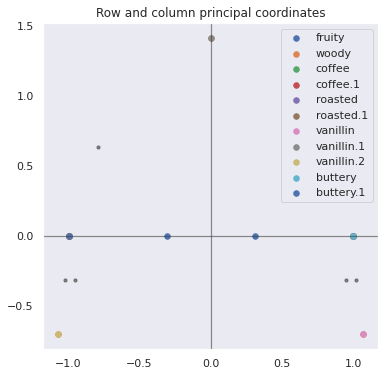

In [ ]:
>>> ax = mca.plot_coordinates(
...     X=X,
...     ax=None,
...     figsize=(6, 6),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=False,
...     legend_n_cols=1
... )

## Example from https://stackoverflow.com/questions/48521740/using-mca-package-in-python

In [ ]:
X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']

print(X.head())

mca = prince.MCA()

    Color   Size   Action    Age Inflated
0  YELLOW  SMALL  STRETCH  ADULT        T
1  YELLOW  SMALL  STRETCH  CHILD        F
2  YELLOW  SMALL      DIP  ADULT        F
3  YELLOW  SMALL      DIP  CHILD        F
4  YELLOW  LARGE  STRETCH  ADULT        T


In [ ]:
mca = mca.fit(X) # same as calling ca.fs_r(1)
#mca = mca.transform(X) # same as calling ca.fs_r_sup(df_new) for *another* test set.
#print(mca)

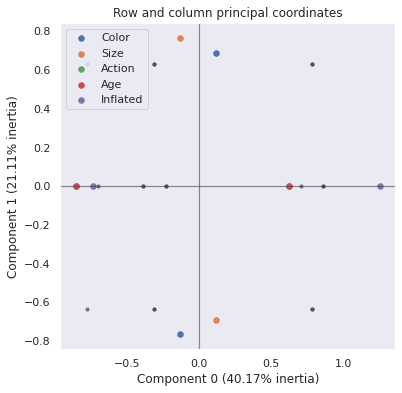

In [ ]:
ax = mca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

## Plotting geo location - per seriousness

Doesn't look very good because levels cover each other. 

In [ ]:
# make long again location x seriousness
merged_df_wide_serious = pd.melt(merged_df_wide, id_vars=['Location', 'longitude', 'latitude'], 
                                 value_vars=['Deadly', 'Minor', 'Serious'], 
                                 var_name = 'Seriousness')

merged_df_wide_serious.sort_values(by = 'Location')

,Location,longitude,latitude,Seriousness,value
0,Alaska,-154.493062,63.588753,Deadly,70
45,Alaska,-154.493062,63.588753,Minor,27
90,Alaska,-154.493062,63.588753,Serious,222
1,Alberta,-77.893700,36.855200,Deadly,59
46,Alberta,-77.893700,36.855200,Minor,26
...,...,...,...,...,...
43,Wyoming,-107.290284,43.075968,Deadly,31
88,Wyoming,-107.290284,43.075968,Minor,14
89,Yukon,-97.763900,35.520100,Minor,0
44,Yukon,-97.763900,35.520100,Deadly,3


In [ ]:
fig = px.scatter_geo(merged_df_wide_serious,
                     color="Seriousness", # which column to use to set the color of markers
                     lon = 'longitude',
                     lat = 'latitude',
                     hover_name="Location", # column added to hover information
                     size="value", # size of markers
                     scope = 'usa')

fig.show()

In [ ]:
# write to csv to look at data
df.to_csv(data_path+'check.csv',sep=',', index=False)

# Back-up code

### Write to CSV

In [ ]:
# write to csv to look at data
merged_df_wide.to_csv(data_path+'merged_df_wide.csv',sep=',', index=False)

In [ ]:
df.to_csv(data_path+'df.csv',sep=',', index=False)

NameError: ignored

### Select columns

In [ ]:
ages = titanic["Age"]
age_sex = titanic[["Age", "Sex"]]

## Remove column

In [ ]:
df = df.drop('column_name', 1)

## Reset index

If you get this error: "None of ['ID'] are in the columns"

In [ ]:
AAC_accidents['ID'] = AAC_accidents.reset_index().index

# if just setting index to a column in the df
AAC_accidents = AAC_accidents.set_index('ID')

ValueError: ignored

## Remove duplicate column

In [ ]:
test2 = test.loc[:,~test.columns.duplicated()]
test2

In [ ]:
# check unique values in column


AttributeError: ignored

## Making suplots without using axs

In [ ]:
plt.subplot(121) #define subplot 1
plt.suptitle("Seriousness of Accidents")
seriousness_count = melt_serious['Seriousness'].value_counts().sort_index() #sort_index() to get the right order set for this category
colours = ['green', 'blue', 'orange'] # 
labels = melt_serious['Seriousness'].cat.categories.tolist()

plt.bar(labels, seriousness_count, color = colours)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot(122)  #define subplot 2
labels = labels
sizes = seriousness_count #set size of pie to number of accidents

plt.pie(sizes, labels = labels, colors = colours, autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('% of accidents', fontsize=12)


plt.show()

# Other stuff

In [ ]:
# melt age
melt_age = AAC_accidents.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'No/Little', 'Moderate',
       'Experienced', 'Unknown', 'Deadly', 'Serious', 'Minor',
       'Head / Brain Injury', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'T op-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location'], 
       ['<15', '15-20', '21-25', '26-30',
       '31-35', '36-50', '51-75', '>75'],
       "Age")

In [ ]:
AAC_accidents

,Search Column\n\n,ID,Accident Title,Publication Year,Text,Tags Applied,COUNT OF TAGS,<15,15-20,21-25,...,April,May,June,July,August,September,October,November,December,Location
0,0,1,Failure of Rappel Setup (Protection Pulled Out...,1990,"Colorado, Rocky Mountain National Park\nOn May...","Serious, Head / Brain Injury, Descent, Roped, ...",8,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0.0,0,Colorado
1,0,2,"Failure of Rappel—Failure to Check System, Bri...",1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...","Experienced, Serious, Descent, Roped, Top-Rope...",7,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0.0,0,British Columbia
2,0,3,"Fall into Crevasse, Climbing Alone, Inadequate...",1990,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...","Experienced, Minor, Unroped , Solo, Climbing A...",9,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0.0,0,Alberta
3,0,4,"Fall into Crevasse, Climbing Unroped, British ...",1990,"British Columbia, Bugaboo Mountains, Bugaboo S...","Minor, Unroped , Solo, Alpine/Mountaineering, ...",5,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0.0,0,British Columbia
4,0,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",1990,"On the afternoon of March 29, 1989, four ski t...","Deadly, Serious, Descent, Unroped , Solo, Non-...",10,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,Alberta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,0,958a,"Fall on Ice, Inadequate Protection, Poor Posit...",2000,"Alberta, Banff National Park, Cascade Waterfal...","No/Little, Deadly, Descent, Unroped , Solo, Ic...",9,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,Alberta
2766,0,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",2000,"Alberta, Banff National Park, Cascade Waterfal...","Serious, Descent, Roped, Ice Climbing, Avalanc...",8,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,1,Alberta
2767,0,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Descent, Alpine/Mountaineering, Ascent Illness...",4,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0.0,0,Alaska
2768,0,995b,Edited title: Acute Mountain Sickness — Alask...,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Serious, Descent, Alpine/Mountaineering, Ascen...",5,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0.0,0,Alaska


In [ ]:
melt_age.columns

Index(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'No/Little', 'Moderate', 'Experienced',
       'Unknown', 'Deadly', 'Serious', 'Minor', 'Head / Brain Injury',
       'Descent', 'Roped', 'Trad Climbing', 'Sport', 'Top-Rope',
       'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separ

In [ ]:
# melt experience
melt_experience = melt_age.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Deadly', 'Serious', 'Minor',
       'Head / Brain Injury', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'Top-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age'], 
       ['No/Little', 'Moderate',
       'Experienced', 'Unknown'],
       "Experience")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
melt_experience.columns

Index(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Deadly', 'Serious', 'Minor',
       'Head / Brain Injury', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'Top-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climb

In [ ]:
# melt outcome
melt_outcome = melt_experience.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'Top-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience'], 
       ['Deadly', 'Serious', 'Minor',
       'Head / Brain Injury'],
       "Outcome")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
# melt type
melt_type = melt_outcome.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience', 'Outcome'], 
       ['Descent', 'Roped', 'Trad Climbing', 'Sport', 'Top-Rope', 'Aid & Big Wall Climbing', 
        'Unroped ', 'Solo', 'Climbing Alone', 'Bouldering', 'Non-climbing', 
        'Alpine/Mountaineering', 'Ice Climbing'],
       "Type")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
melt_type

,Search Column\n\n,ID,Accident Title,Publication Year,Text,Tags Applied,COUNT OF TAGS,Pendulum,Piton/Ice Screw,Ascent Illness,...,September,October,November,December,Location,Age,Experience,Outcome,Type,value
0,0,1,Failure of Rappel Setup (Protection Pulled Out...,1990,"Colorado, Rocky Mountain National Park\nOn May...","Serious, Head / Brain Injury, Descent, Roped, ...",8,0.0,0.0,0.0,...,0,0,0.0,0,Colorado,<15,No/Little,Deadly,Descent,1.0
1,0,2,"Failure of Rappel—Failure to Check System, Bri...",1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...","Experienced, Serious, Descent, Roped, Top-Rope...",7,0.0,0.0,0.0,...,0,0,0.0,0,British Columbia,<15,No/Little,Deadly,Descent,1.0
2,0,3,"Fall into Crevasse, Climbing Alone, Inadequate...",1990,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...","Experienced, Minor, Unroped , Solo, Climbing A...",9,0.0,0.0,0.0,...,0,0,0.0,0,Alberta,<15,No/Little,Deadly,Descent,0.0
3,0,4,"Fall into Crevasse, Climbing Unroped, British ...",1990,"British Columbia, Bugaboo Mountains, Bugaboo S...","Minor, Unroped , Solo, Alpine/Mountaineering, ...",5,0.0,0.0,0.0,...,1,0,0.0,0,British Columbia,<15,No/Little,Deadly,Descent,0.0
4,0,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",1990,"On the afternoon of March 29, 1989, four ski t...","Deadly, Serious, Descent, Unroped , Solo, Non-...",10,0.0,0.0,0.0,...,0,0,0.0,0,Alberta,<15,No/Little,Deadly,Descent,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609275,0,958a,"Fall on Ice, Inadequate Protection, Poor Posit...",2000,"Alberta, Banff National Park, Cascade Waterfal...","No/Little, Deadly, Descent, Unroped , Solo, Ic...",9,0.0,0.0,0.0,...,0,0,0.0,1,Alberta,>75,Unknown,Head / Brain Injury,Ice Climbing,1.0
4609276,0,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",2000,"Alberta, Banff National Park, Cascade Waterfal...","Serious, Descent, Roped, Ice Climbing, Avalanc...",8,0.0,0.0,0.0,...,0,0,0.0,1,Alberta,>75,Unknown,Head / Brain Injury,Ice Climbing,1.0
4609277,0,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Descent, Alpine/Mountaineering, Ascent Illness...",4,0.0,0.0,1.0,...,0,0,0.0,0,Alaska,>75,Unknown,Head / Brain Injury,Ice Climbing,0.0
4609278,0,995b,Edited title: Acute Mountain Sickness — Alask...,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Serious, Descent, Alpine/Mountaineering, Ascen...",5,0.0,0.0,1.0,...,0,0,0.0,0,Alaska,>75,Unknown,Head / Brain Injury,Ice Climbing,0.0


In [ ]:
# melt ice
# subset data
ice = melt_type[['Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position']]

In [ ]:
ice

,Piton/Ice Screw,Ascent Illness,Crampon Issues,Glissading,Ski-related,Poor Position
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4609275,0.0,0.0,0.0,0.0,0.0,1.0
4609276,0.0,0.0,0.0,0.0,0.0,0.0
4609277,0.0,1.0,0.0,0.0,0.0,0.0
4609278,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
melt_ice = ice.melt(['Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position'],
       "Ice")

ValueError: ignored

In [ ]:
# melt type
melt_month = melt_type.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'Location', 'Age', 'Experience', 'Outcome', 'Type'], 
        ['January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December'],
       "Month")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
melt_AAC.columns

Index(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 'Piton/Ice Screw',
       'Ascent Illness', 'Crampon Issues', 'Glissading', 'Ski-related ',
       'Poor Position', 'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Fail

# not working

In [ ]:
# melt ice
melt_AAC = melt_AAC.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience', 'Outcome', 
       'Type'], 
       ['Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position'],
       "Ice")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
# melt nature
melt_nature = melt_type.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience', 'Outcome', 
       "Type"], 
       [ 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall'],
       "Nature")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
# melt nature
melt_AAC = melt_AAC.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience', 'Outcome', 
       "Type", "Ice"], 
       [ 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall'],
       "Nature")

In [ ]:
full_data_summary = AAC_accidents.describe()
full_data_summary

,Search Column\n\n,Publication Year,COUNT OF TAGS,<15,15-20,21-25,26-30,31-35,36-50,51-75,...,Inadequate Equipment,Inadequate Protection / Pulled,Anchor Failure / Error,Stranded / Lost / Overdue,Belay Error,Rappel Error,Lowering Error,Miscommunication,January,November
count,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,...,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
mean,0.050181,2003.824549,6.089170,0.006137,0.099278,0.210469,0.221300,0.158845,0.278339,0.099639,...,0.088448,0.218773,0.049097,0.117329,0.045848,0.092058,0.028520,0.025271,0.035740,0.033574
std,0.221640,39.070894,2.144557,0.082608,0.593603,0.516362,0.525047,0.417264,0.585857,0.349637,...,0.283996,0.413489,0.216111,0.321869,0.209194,0.289160,0.166483,0.156975,0.185675,0.180162
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1997.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2004.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2013.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2019.000000,17.000000,2.000000,25.000000,4.000000,5.000000,3.000000,6.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
